In [43]:
%matplotlib notebook
import pandas as pd
#from IPython.display import display
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [44]:
country_data = "/Users/shilpa/Desktop/Boringppl_project/WasteManagement/Data/country_level_data_0.csv"
country_data_df = pd.read_csv(country_data, encoding = 'utf-8')
country_data_df.columns

Index(['iso3c', 'region_id', 'country_name', 'income_id', 'gdp',
       'composition_food_organic_waste_percent', 'composition_glass_percent',
       'composition_metal_percent', 'composition_other_percent',
       'composition_paper_cardboard_percent', 'composition_plastic_percent',
       'composition_rubber_leather_percent', 'composition_wood_percent',
       'composition_yard_garden_green_waste_percent',
       'other_information_information_system_for_solid_waste_management',
       'other_information_national_agency_to_enforce_solid_waste_laws_and_regulations',
       'other_information_national_law_governing_solid_waste_management_in_the_country',
       'other_information_ppp_rules_and_regulations',
       'other_information_summary_of_key_solid_waste_information_made_available_to_the_public',
       'population_population_number_of_people',
       'special_waste_agricultural_waste_tons_year',
       'special_waste_construction_and_demolition_waste_tons_year',
       'special_w

# Get the required columns

In [45]:
## Dop these columns, fillna

df = country_data_df.drop(['iso3c', 'region_id','composition_food_organic_waste_percent', 'composition_glass_percent',
       'composition_metal_percent', 'composition_other_percent',
       'composition_paper_cardboard_percent', 'composition_plastic_percent',
       'composition_rubber_leather_percent', 'composition_wood_percent',
       'composition_yard_garden_green_waste_percent',
       'other_information_information_system_for_solid_waste_management',
       'other_information_national_agency_to_enforce_solid_waste_laws_and_regulations',
       'other_information_national_law_governing_solid_waste_management_in_the_country',
       'other_information_ppp_rules_and_regulations',
       'other_information_summary_of_key_solid_waste_information_made_available_to_the_public',
       'special_waste_agricultural_waste_tons_year',
       'special_waste_construction_and_demolition_waste_tons_year',
       'special_waste_e_waste_tons_year',
       'special_waste_hazardous_waste_tons_year',
       'special_waste_industrial_waste_tons_year',
       'special_waste_medical_waste_tons_year',
       'total_msw_total_msw_generated_tons_year',
       'waste_collection_coverage_rural_percent_of_geographic_area',
       'waste_collection_coverage_rural_percent_of_households',
       'waste_collection_coverage_rural_percent_of_population',
       'waste_collection_coverage_rural_percent_of_waste',
       'waste_collection_coverage_total_percent_of_geographic_area',
       'waste_collection_coverage_total_percent_of_households',
       'waste_collection_coverage_total_percent_of_population',
       'waste_collection_coverage_total_percent_of_waste',
       'waste_collection_coverage_urban_percent_of_geographic_area',
       'waste_collection_coverage_urban_percent_of_households',
       'waste_collection_coverage_urban_percent_of_population',
       'waste_collection_coverage_urban_percent_of_waste',
       'waste_treatment_anaerobic_digestion_percent',
       'waste_treatment_compost_percent',
       'waste_treatment_controlled_landfill_percent',
       'waste_treatment_incineration_percent',
       'waste_treatment_landfill_unspecified_percent',
       'waste_treatment_open_dump_percent', 'waste_treatment_other_percent',
       'waste_treatment_recycling_percent',
       'waste_treatment_sanitary_landfill_landfill_gas_system_percent',
       'waste_treatment_unaccounted_for_percent',
       'waste_treatment_waterways_marine_percent',
       'where_where_is_this_data_measured'], axis=1)
df.fillna(0).head(3)



country_name income_id           gdp  population_population_number_of_people
0        Aruba       HIC  0.000000e+00                                103187.0
1  Afghanistan       LIC  2.141361e+10                              34656032.0
2       Angola       LMC  1.030423e+11                              25096150.0

# Count all countries and separate them to the appropriate labels

In [46]:
## Count how many LIC, LMC, UMC and HIC are there in the income_id columns for plotting  

Income_world = country_data_df.income_id.value_counts()
df_income = pd.DataFrame(Income_world)
df_income_T = df_income.T
df_income_T.reset_index()
a = df_income_T[['LIC', 'LMC', 'UMC', 'HIC']]
a



LIC  LMC  UMC  HIC
income_id   33   47   56   81

# Take the sum of population in each group 

In [53]:
## Groupby income_id, get_group LIC, LMC, UMC, HIC and convert to a dataframe 
Pop_LIC = df.groupby('income_id').get_group('LIC').fillna(0).drop_duplicates().set_index('country_name')
df1 = Pop_LIC.sum(axis=0)
df_LIC= pd.DataFrame(df1)

Pop_LMC = df.groupby('income_id').get_group('LMC').fillna(0).drop_duplicates().set_index('country_name')
df1 = Pop_LMC.sum(axis=0)
df_LMC= pd.DataFrame(df1)

Pop_UMC = df.groupby('income_id').get_group('UMC').fillna(0).drop_duplicates().set_index('country_name')
df1 = Pop_UMC.sum(axis=0)
df_UMC= pd.DataFrame(df1)

Pop_HIC = df.groupby('income_id').get_group('HIC').fillna(0).drop_duplicates().set_index('country_name')
df1 = Pop_HIC.sum(axis=0)
df_HIC= pd.DataFrame(df1)
df_HIC


# Concat all dataframes, and rename the columns

df_Pop = pd.concat([df_LIC,df_LMC,df_UMC,df_HIC], axis=1)
df_Pop.columns=["LIC", "LMC", "UMC", "HIC"]
df_Pop.index.names = ['Pop/GDP']
df_world_Pop = df_Pop.drop(['income_id', 'gdp'])
Pop_Income=df_world_Pop.rename(index = {'gdp':'GDP',
                      'population_population_number_of_people': 'Population',
                        'income_id': 'Income'})

# Concat income and population in a dataframe. Convert population to few decimals
Final = pd.concat([a, Pop_Income], axis=0).T
Short_Pop = [0.63, 2.58, 2.52 ,1.22]
Final['Short_Pop'] = Short_Pop
Final_1 = Final.rename(columns = {'income_id': 'Income',
                      'Population': 'Pop',
                         'Short_Pop': 'Population'})
Final_1.reset_index()


index Income          Pop  Population
0   LIC     33  6.32142e+08        0.63
1   LMC     47  2.58195e+09        2.58
2   UMC     56  2.52651e+09        2.52
3   HIC     81  1.22908e+09        1.22

# Plot grouped chart with primary and secondary y-axis 

<IPython.core.display.Javascript object>


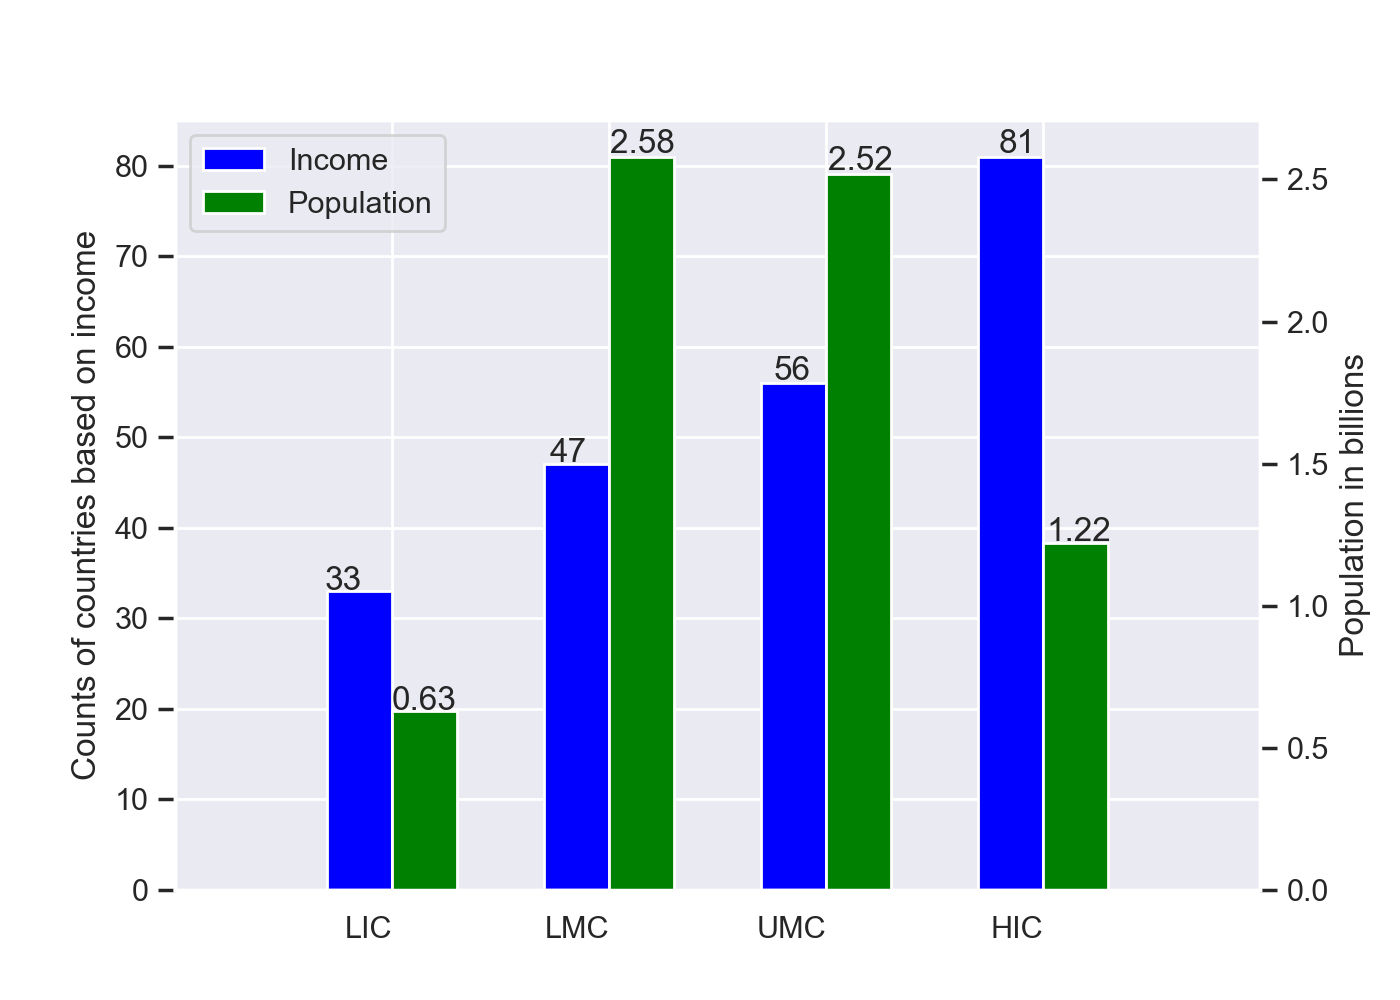

In [32]:
# Import dependencies 
import matplotlib.pyplot as plt 
import numpy as np

sns.set()
fig = plt.figure(figsize=(7,5)) # Create matplotlib figure
ax = fig.add_subplot(111) # Create matplotlib axes
ax2 = ax.twinx() # Create another axes that shares the same x-axis as a

width = .3 # bar widths


# Plot value_counts for each income groups, in the first position
# Plot total population for each income groups, in the second position

Final_1.Income.plot(kind='bar',color='blue',ax=ax,width=width, position=1) 
Final_1.Population.plot(kind='bar',color='green', ax=ax2,width = width, position=0)


#Annotate the values on each bar for Income and Population for easy understanding
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.035, p.get_height() * 1.005))

for p in ax2.patches:
    ax2.annotate(str(p.get_height()), (p.get_x() * 1.005, p.get_height() * 1.005))
    
 
    
# Legends to show that blue bar is for 'Income' groups and green bars for 'Population'    
fig.legend(loc="upper left", bbox_to_anchor=(0,1), bbox_transform=ax.transAxes)

# Grid lines, both y-axis labels, set limits for x-axis, x-axis labels
#ax.grid(None)#(None,axis=1)
ax2.grid(None)

# Both y-axis labels
ax.set_ylabel('Counts of countries based on income')
ax2.set_ylabel('Population in billions')

# Set limits for x-axis
ax.set_xlim(-1,4)

# x-axis labels, save and show figure
ax.set_xticklabels(ax.get_xticklabels(),rotation=0, ha='right')
#plt.savefig('Income_population.png')
plt.show()

In [25]:
###Income value_counts() plotting only!!!!!!!

# Income_world = country_data_df.income_id.value_counts()

# Income_world.plot.bar(legend=True, stacked=False, rot=0);
# plt.legend(loc='center left',bbox_to_anchor=(1.0, 0.5))
# plt.show()
# plt.tight_layout()

# The end